<a href="https://colab.research.google.com/github/vladimirwest/DeOldify_universal_colab/blob/master/deoldify_universal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#◢ DeOldify - Colorize your own photos!

####**Credits:**
Original repo - https://github.com/jantic/DeOldify  
My github [@vladimirwest](https://github.com/vladimirwest)

This is universial colab notebook for videos, photos and photos archieves conversion.



---


#◢ Verify Correct Runtime Settings

**<font color='#FF000'> IMPORTANT </font>**

In the "Runtime" menu for the notebook window, select "Change runtime type." Ensure that the following are selected:
* Runtime Type = Python 3
* Hardware Accelerator = GPU 


In [0]:
#@title ##**Libraries and environment installation** { display-mode: "form" }
#@markdown *Download pre-trained models and clone the repo.*


!git clone https://github.com/jantic/DeOldify.git DeOldify
%cd DeOldify
#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId
#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)

import torch

if not torch.cuda.is_available():
    print('GPU not available.')

!pip install -r colab_requirements.txt

import fastai
from deoldify.visualize import *
from IPython.display import clear_output
from google.colab import files
from pathlib import Path
from google.colab import files

!mkdir 'models'
!wget https://www.dropbox.com/s/zkehq1uwahhbc2o/ColorizeArtistic_gen.pth?dl=0 -O ./models/ColorizeArtistic_gen.pth
clear_output()
print('Done!')

Done!


#◢ Instructions

In [0]:
from google.colab import files

In [0]:
#@title ##**File load** { display-mode: "form" }
#@markdown *Enter a link to the file below (for example, YouTube video), or leave the ** source_url ** field blank (in this case, you will be prompted to download the file from your computer).*  
#  @markdown Supported types:
#@markdown *  .zip - archive with pictures
#@markdown *  .mp4
#@markdown *  .png or .jpg
#  @markdown 
source_url = '' #@param {type:"string"}

if source_url == '':
  uploaded = files.upload()
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
  file_ext = fn.split(".")[-1]
  file_name = "downloaded." + file_ext
  if(file_ext =='jpg' or file_ext == 'png'):
    file_type = 'image'
  elif(file_ext =='mp4'):
    file_type = 'video'
  elif(file_ext =='zip'):
    file_type = 'zip'
  else:
    file_type = 'other'
  !mv -f $fn $file_name

else:
  try:
    ydl_opts = {
        'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
        'outtmpl': 'downloaded.mp4',
        }
    with youtube_dl.YoutubeDL(ydl_opts) as ydl:
      ydl.download([source_url])
    file_name = 'downloaded.mp4'
  
  except BaseException:
    !wget $source_url
    fn = source_url.split('/')[-1]
    file_ext = fn.split(".")[-1]
    file_name = "downloaded." + file_ext
    !mv -f $fn $file_name
    if(file_ext =='jpg' or file_ext == 'png'):
      file_type = 'image'
    elif(file_ext =='mp4'):
      file_type = 'video'
    elif(file_ext =='zip'):
      file_type = 'zip'
    else:
      file_type = 'other'

clear_output()
print(file_type)
print('Done!')


zip
Done!


Unzipping files, please wait
Archive:  downloaded.zip
 extracting: images_folder/funik2.png  
  inflating: images_folder/unnamed.jpg  
Фотка_879514.jpg:  mismatching "local" filename (╨д╨╛╤В╨║╨░_879514.jpg),
         continuing with "central" filename version
  inflating: images_folder/Фотка_879514.jpg  
updating: result_images/ (stored 0%)
updating: result_images/funik2.png (deflated 0%)
updating: result_images/unnamed.jpg (deflated 0%)
updating: result_images/Фотка_879514.jpg (deflated 0%)


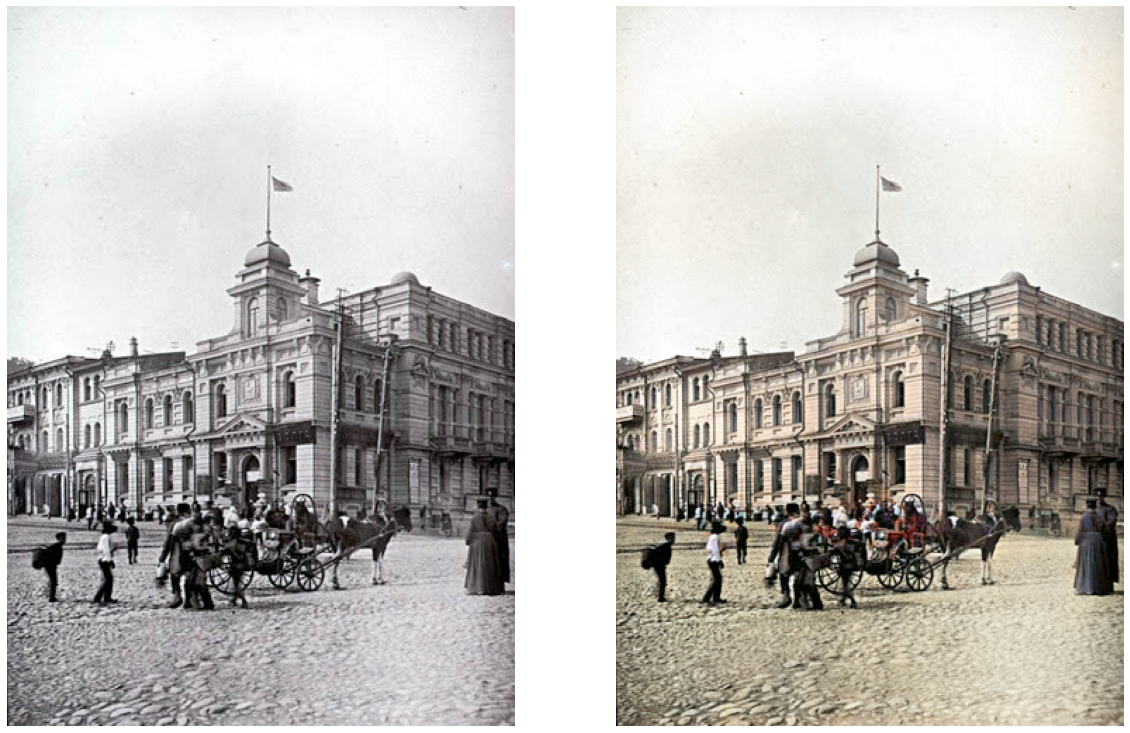

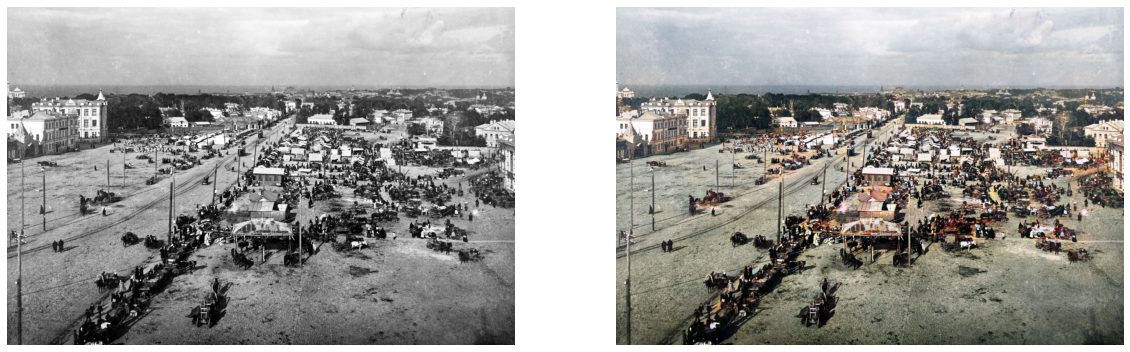

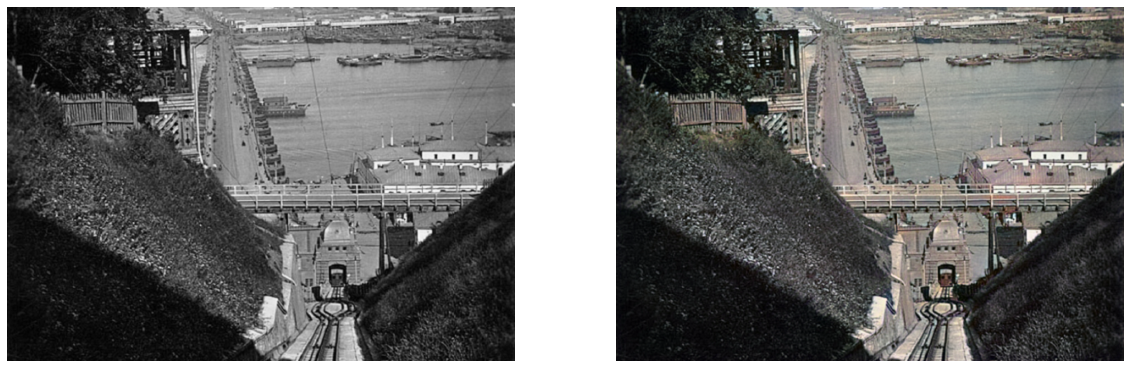

In [0]:
from os import listdir
#@markdown *Download converted file:*
download_file = False #@param {type:"boolean"}
render_factor = 35  #@param {type: "slider", min: 7, max: 40}
if(file_type == 'image'):
  colorizer = get_image_colorizer(artistic=True)
  clear_output()
  image_path = colorizer.plot_transformed_image(path=file_name, render_factor=render_factor, compare=True)
  show_image_in_notebook(image_path)
  if(download_file):
    files.download(image_path)

elif(file_type == 'video'):
  colorizer = get_video_colorizer()
  clear_output()






elif(file_type == 'zip'):
  colorizer = get_image_colorizer(artistic=True)
  clear_output()
  print('Unzipping files, please wait')
  !unzip -o $file_name -d 'images_folder'
  types = ('*.jpg', '*.png') # the tuple of file types
  files_grabbed = []
  for files_ in types:
    files_grabbed.extend(Path('images_folder').rglob(files_))
  for file_ in files_grabbed:
    image_path = colorizer.plot_transformed_image(path=file_, render_factor=render_factor, compare=True)
  #show_image_in_notebook(image_path)
  !zip -r -o converted_images.zip result_images
  files.download('converted_images.zip')








else:
  print('Wrong file extension, please try another file!')  


